# Predictive Modeling: Regression

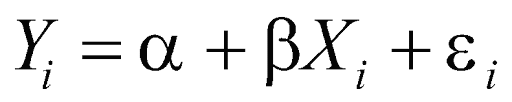

This project will entail employing Regression model(s) and evaluate its effectiveness in Predictive Modeling.

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between 
a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). 

Regression analysis is primarily used for two conceptually distinct purposes:

* First, regression analysis is widely used for prediction and forecasting, where its use has substantial overlap with the field of machine learning. 

* Second, in some situations regression analysis can be used to infer causal relationships between the independent and dependent variables. 

To use regressions for prediction or to infer causal relationships, respectively, a researcher must carefully justify why existing relationships have predictive power for a new context or why a relationship between two variables has a causal interpretation. The latter is especially important when researchers hope to estimate causal relationships using observational data.

Source: Wikipedia

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../input/boston-house-prices/housing.csv', delim_whitespace=True, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [4]:
# create feature name columns
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
# redefine feature names
df.columns = col_name

## preprocessing

In [6]:
# verify there are no missing items in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## exploratory data anaysis (eda)

In [7]:
# short statistics on the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## data visualization

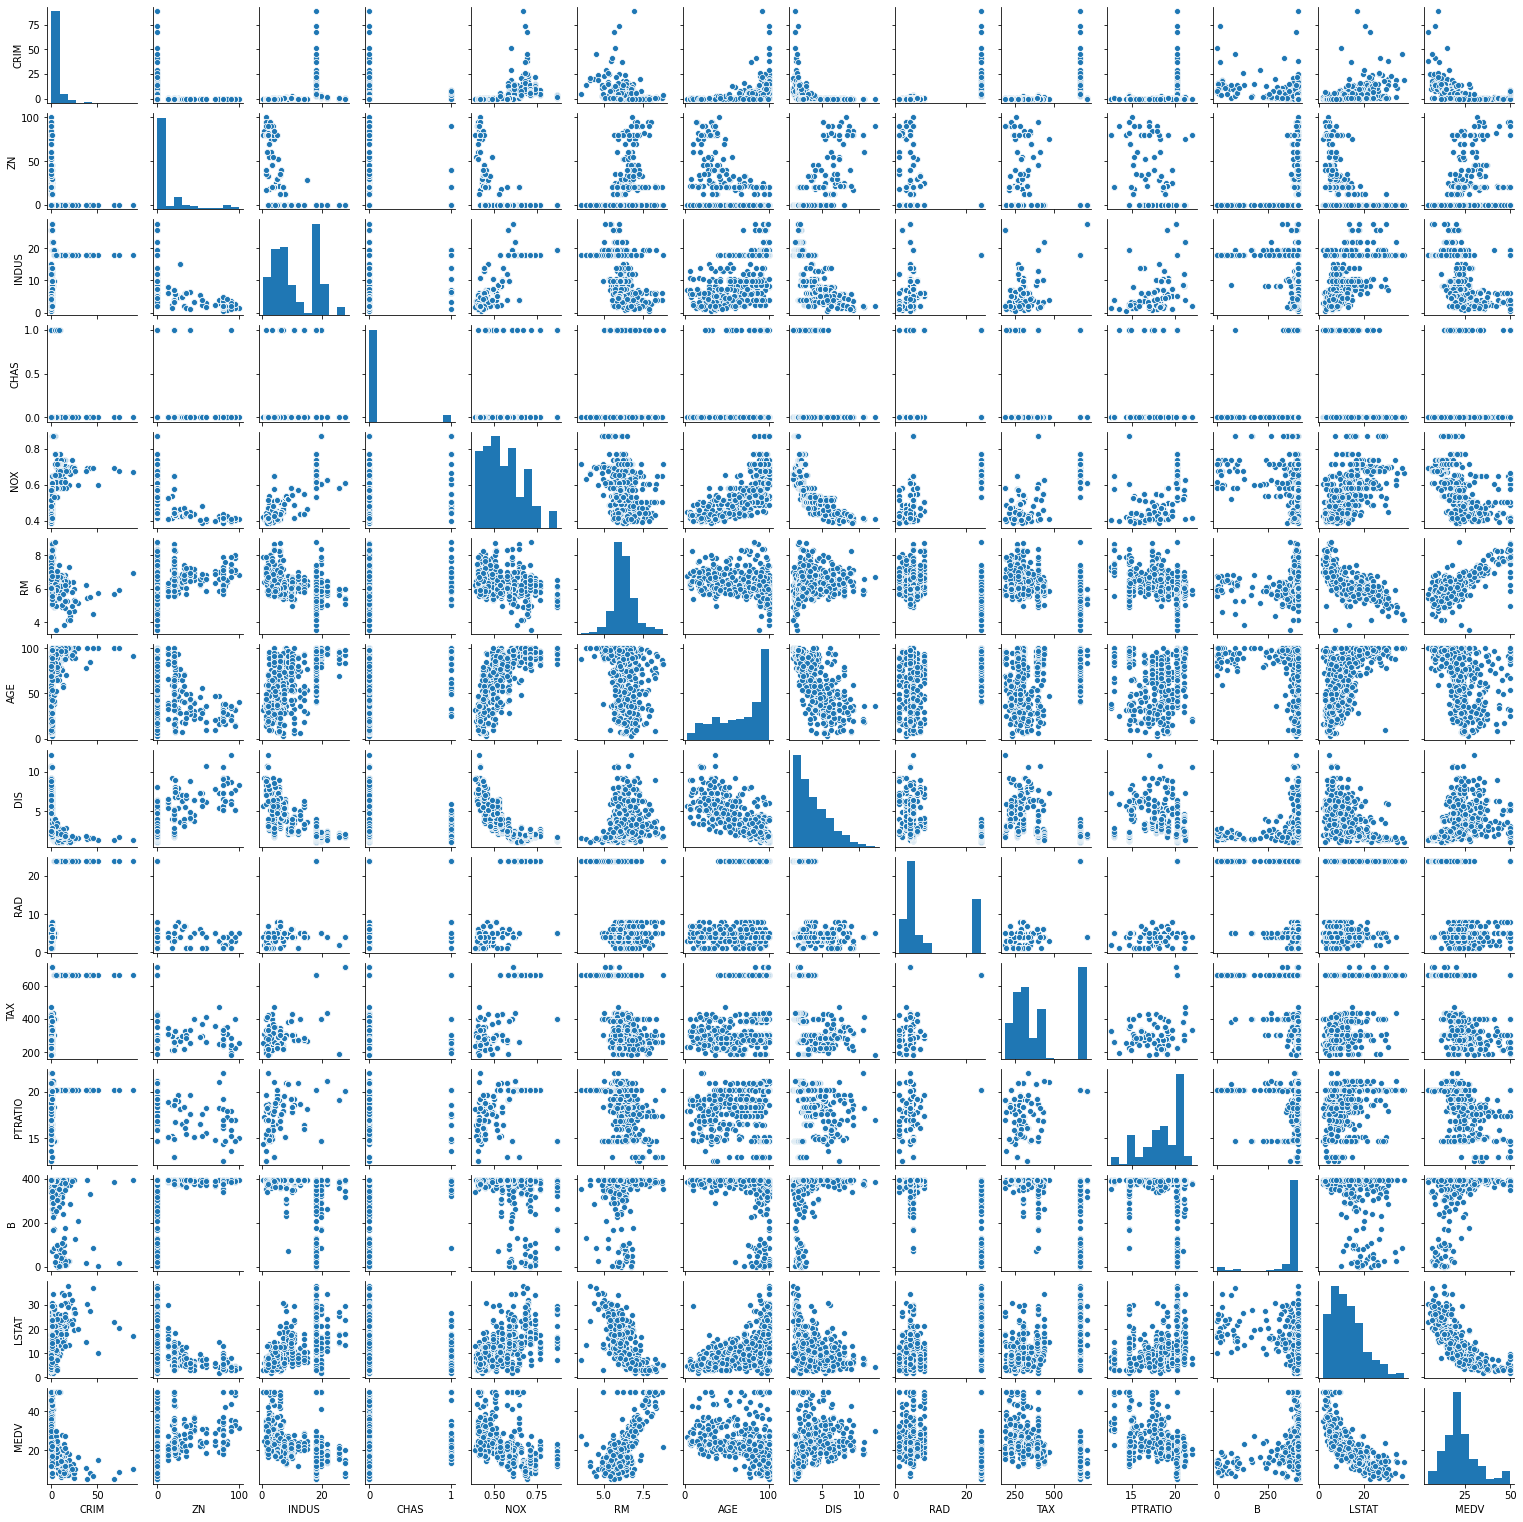

In [8]:
# visualize features relationships
sns.pairplot(df, height=1.5);
plt.show()

In [9]:
# examine certain features
col_study = ['ZN', 'INDUS', 'NOX', 'RM']

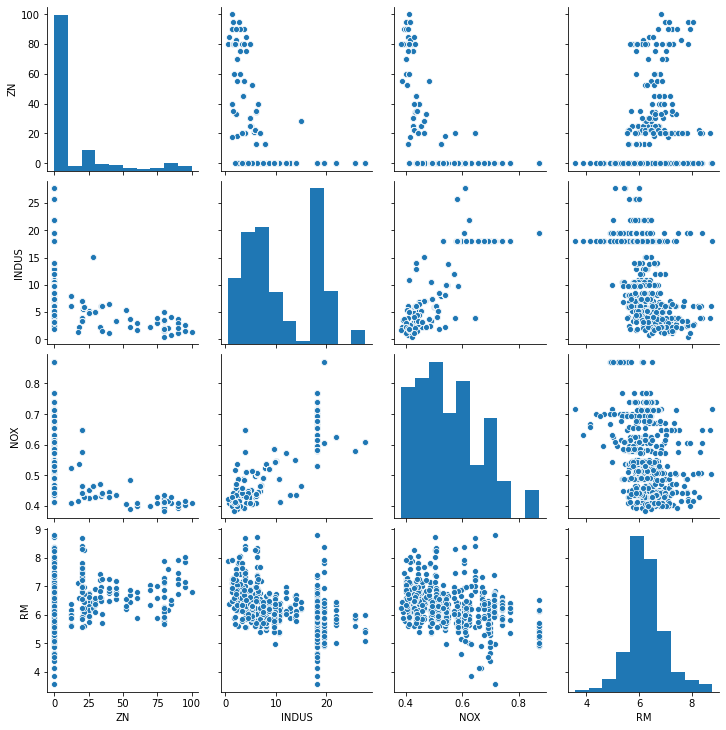

In [10]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [11]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

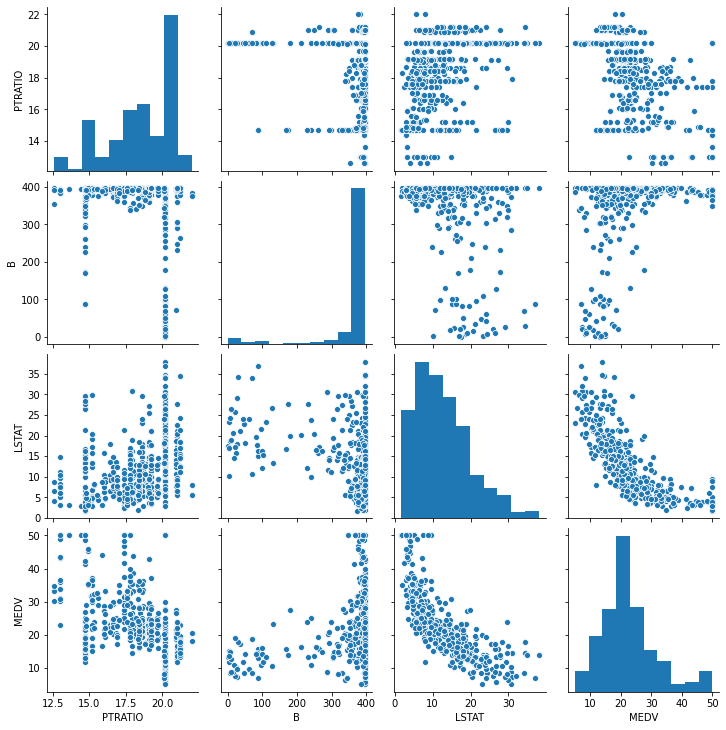

In [12]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

## correlation analysis  

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


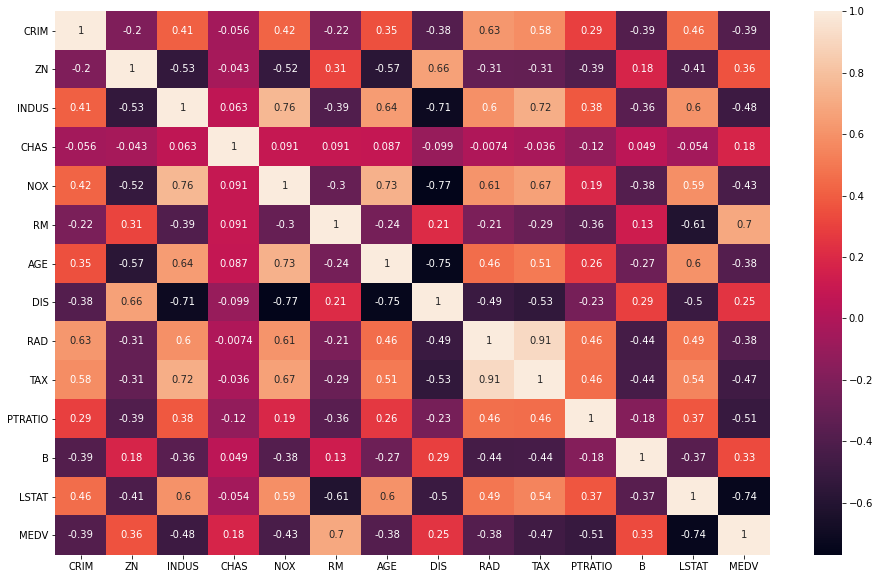

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

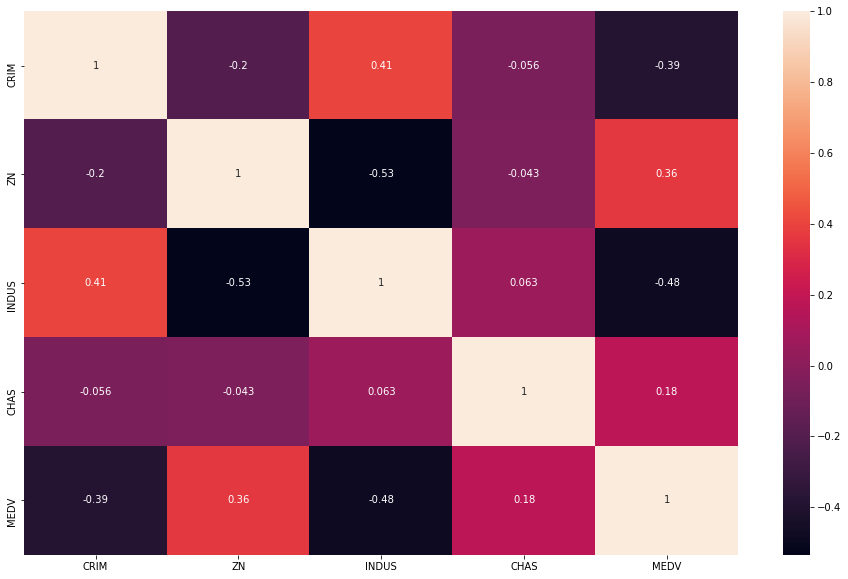

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True)
plt.show()

## linear regression with scikit-learn

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [18]:
X = df['RM'].values.reshape(-1,1)

In [19]:
y = df['MEDV'].values

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
model.coef_

array([9.10210898])

In [24]:
model.intercept_

-34.670620776438554

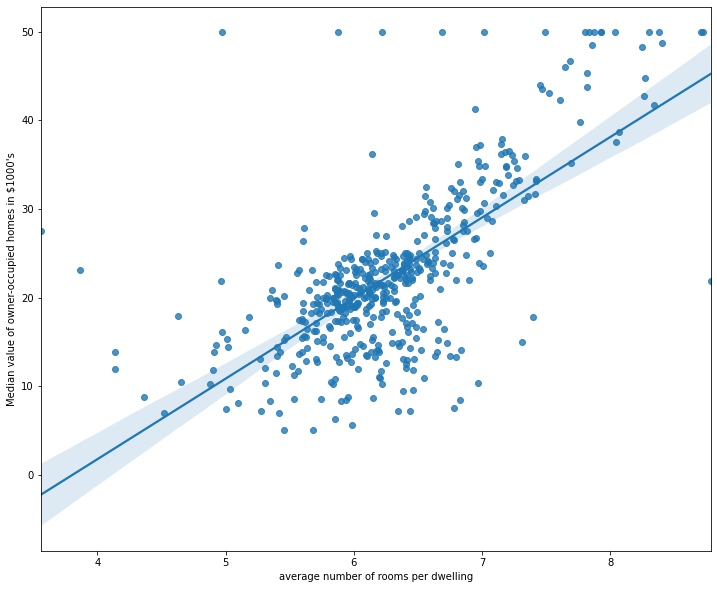

In [25]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

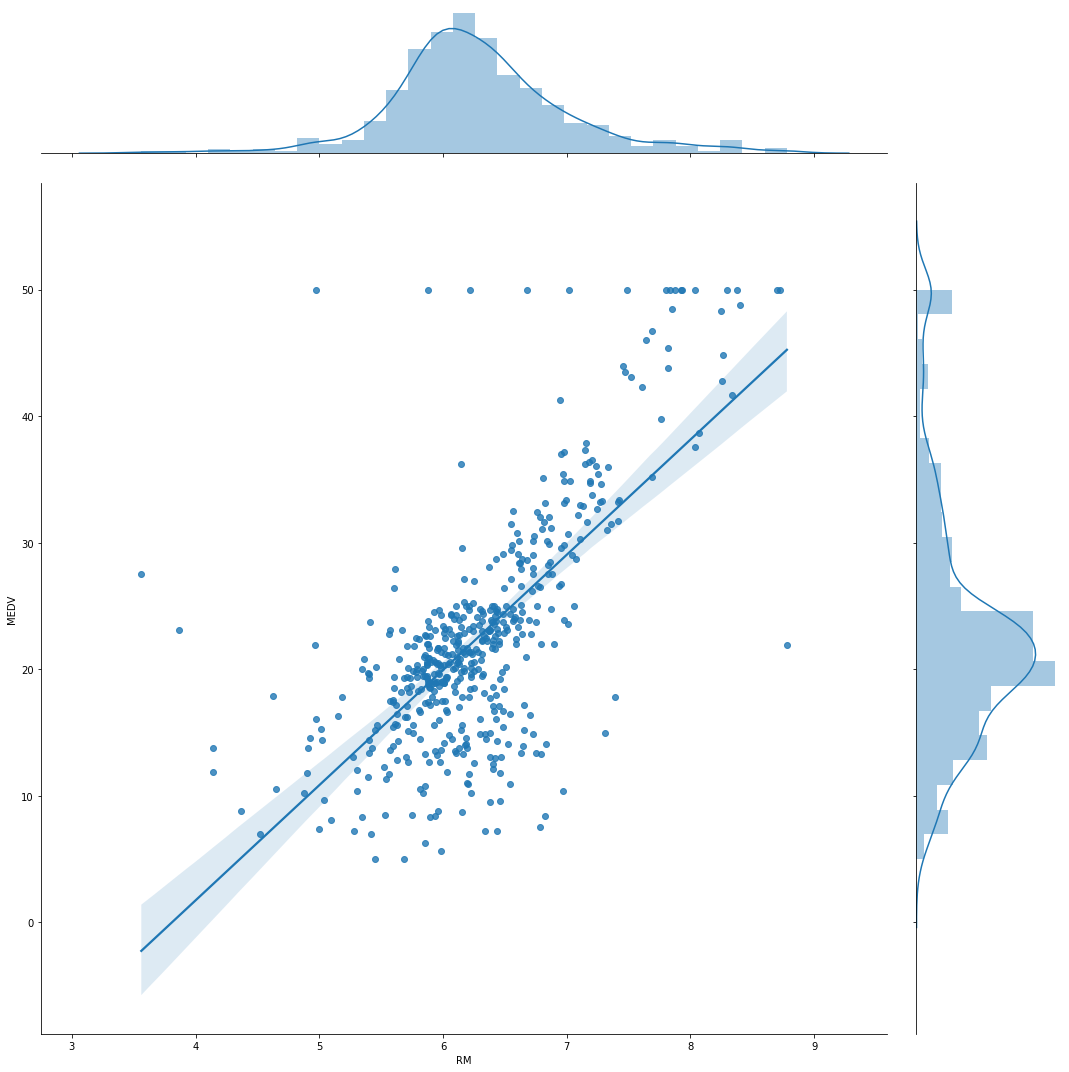

In [26]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=15, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None,);
plt.show();

***

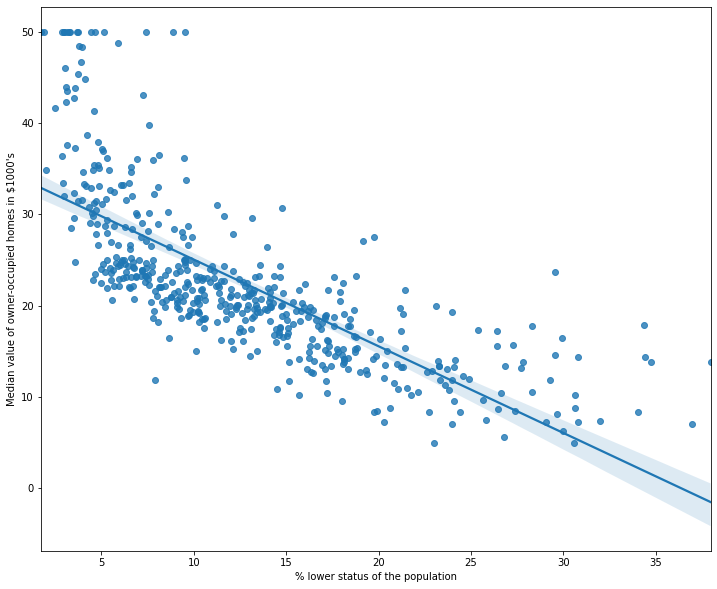

In [27]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
model.fit(X, y)
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

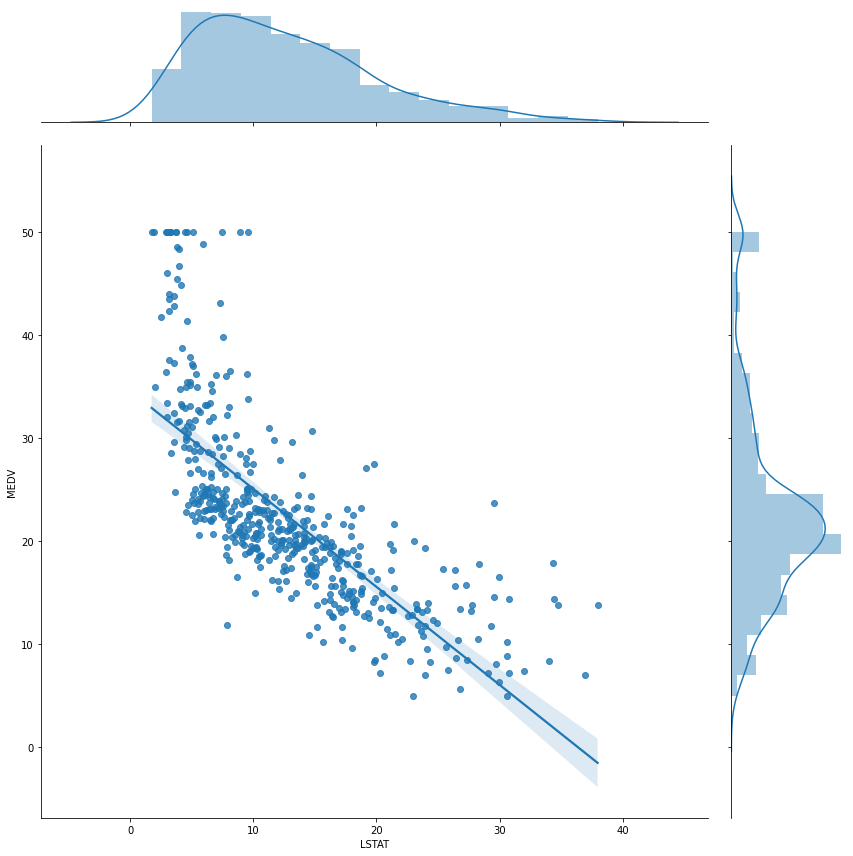

In [28]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=12);
plt.show();

***

 ## robust regression

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


### RANdom SAmple Consensus (RANSAC) Algorithm

[http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [30]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [31]:
from sklearn.linear_model import RANSACRegressor

In [32]:
ransac = RANSACRegressor()

In [33]:
ransac.fit(X, y)

RANSACRegressor()

In [34]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [35]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [36]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

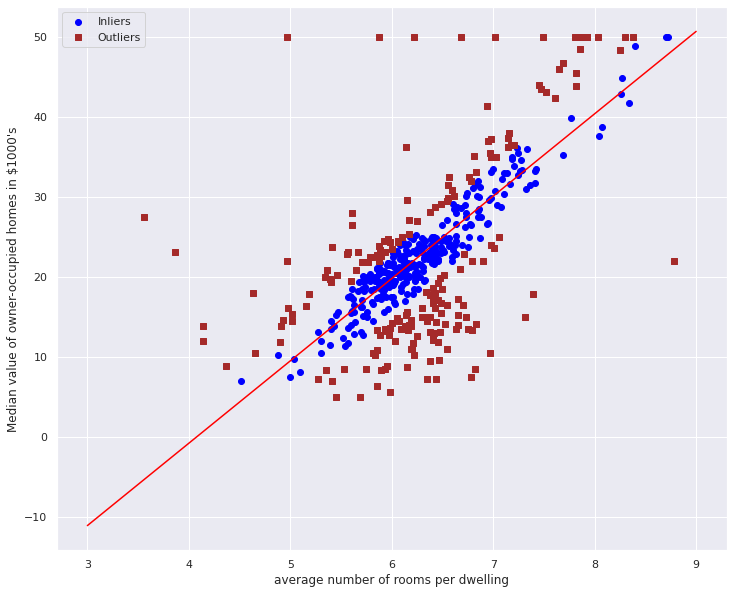

In [37]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [38]:
ransac.estimator_.coef_

array([10.29544585])

In [39]:
ransac.estimator_.intercept_

-42.004562528376475

In [40]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

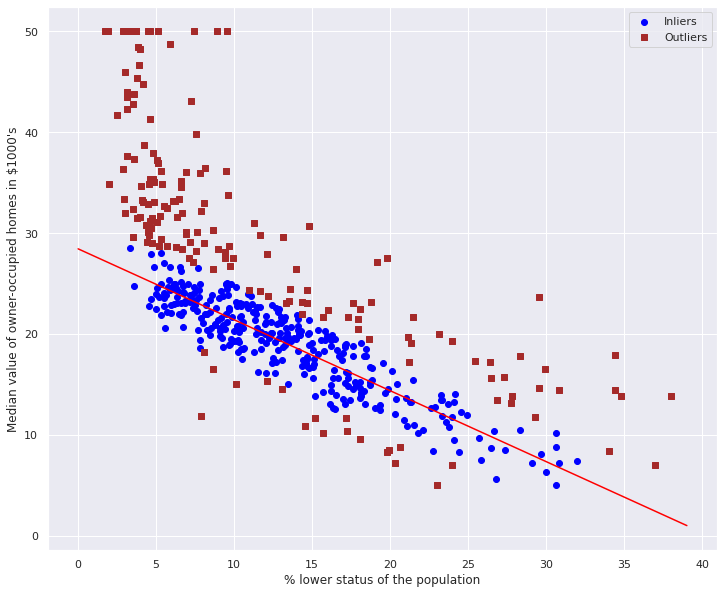

In [41]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

***

## performance evaluation 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [44]:
y = df['MEDV'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_train_pred = lr.predict(X_train)

In [49]:
y_test_pred = lr.predict(X_test)

### method: residual analysis

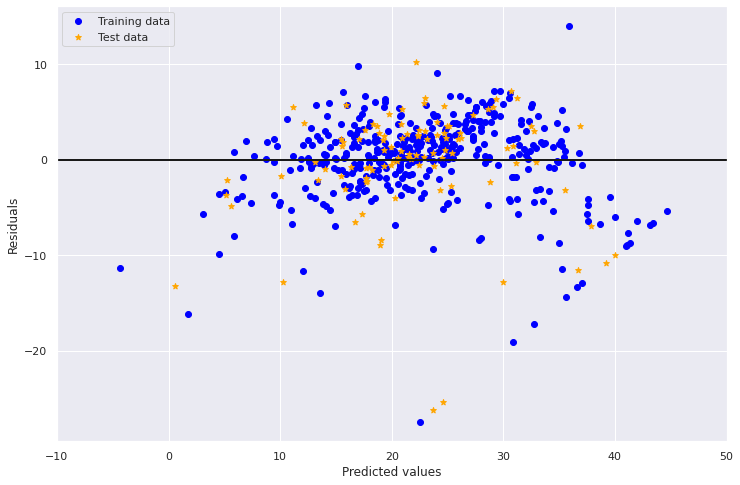

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

***

### method: mean squared error (mse)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(y_train, y_train_pred)

19.32647020358573

In [53]:
mean_squared_error(y_test, y_test_pred)

33.4489799976764

### method: coefficient of determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_train, y_train_pred)

0.7730135569264233

In [56]:
r2_score(y_test, y_test_pred)

0.5892223849182523

***

## final review

### performance of a good model

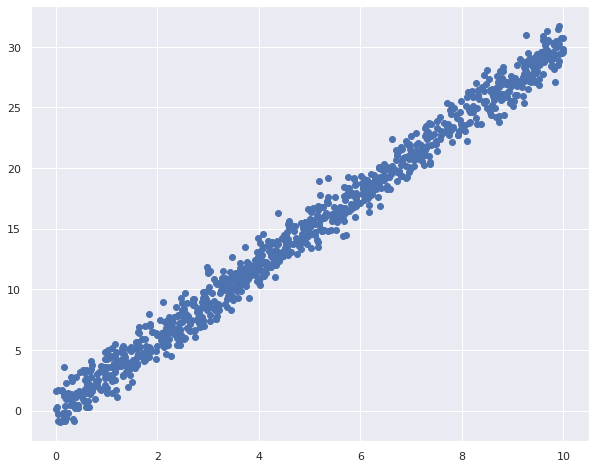

In [57]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

### method: residual analysis

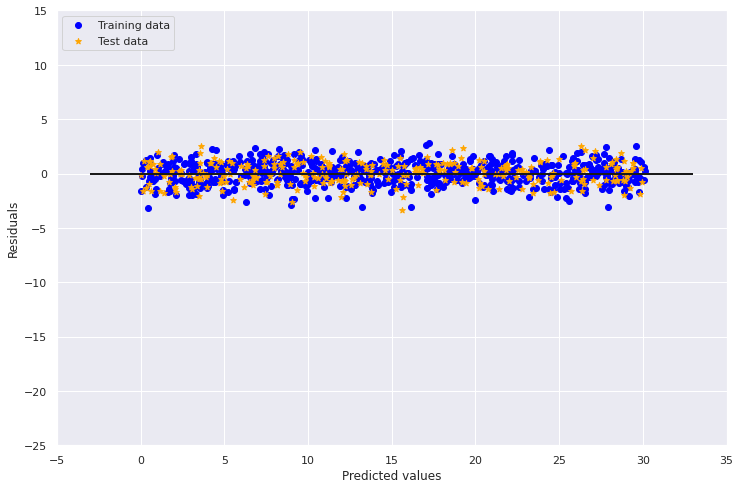

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

### method: mean squared error (mse)

In [62]:
mean_squared_error(y_train, y_train_pred)

0.9730611357799471

In [63]:
mean_squared_error(y_test, y_test_pred)

1.0364308594718135

### method: coefficient of determination, $R^2$

In [64]:
r2_score(y_train, y_train_pred)

0.9873934201574389

In [65]:
r2_score(y_test, y_test_pred)

0.9866518584337007

References: Wikipedia, Anthony Ng